# Lab 1 - Generalization

In this lab session, we will examine the importance of generalization in the design of machine learning algorithms. 
Additionally, we will introduce Scikit-Learn (sklearn), a widely-used library that provides numerous pre-implemented machine learning algorithms.

Specifically, we will go through a Machine Learning pipeline that usually involves:

1. Define the problem you want to solve  
2. Collect data  
3. Preprocess the data  
4. Define a set of candidate models  
5. Select the best model  
6. Estimate performance on unseen data  


Material for the lab:  
1. Chapter 5 of the **"An Introduction to Statistical Learning"** book.
2. For an introduction to python and useful libraries we highly recommend to review the Python introductory chapter ("2.3 Lab: Introduction to Python") from the book **"An Introduction to Statistical Learning"** book.  


The book can be found [here](https://www.statlearning.com/).

# Import python libraries

In [1]:
# !pip install numpy
# !pip install pandas

You should consider upgrading via the '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/envs/bayesian-fairness/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/envs/bayesian-fairness/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Load Dataset

![uci ml repo](./figures/UCI_repo.png)

The [**UCI machine learning repository**](https://archive.ics.uci.edu) is a valuable resource in the field of machine learning and data mining. It is maintained by the University of California, Irvine (UCI), and provides a vast collection of datasets that are frequently used for research, experimentation, and education in the machine learning community. 

## Iris Dataset

<img src="./figures/dataset-cover.jpg" alt="Generalization" width="1000"/>

We will use the iris dataset, with our goal being to classify flowers into different categories based on certain features. 

You can find more information about the dataset on the following [webpage](https://archive.ics.uci.edu/dataset/53/iris)

In [3]:
features = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

target = 'Class'

### load some data with pandas

csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
dataset = pd.read_csv(csv_url, names=features + [target])

### lets have a quick look on our dataset
Our dataset consist of a set of different features together with a target category for classification

In [4]:
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


lets see different information on our dataset

In [5]:
data_x = dataset[features]
data_y = dataset[[target]]

In [6]:
print("Shape of our dataset:", dataset.shape)
print("Number of features:", data_x.shape[1])
print("Number of examples:", data_x.shape[0])

Shape of our dataset: (150, 5)
Number of features: 4
Number of examples: 150


In [7]:
print("Number of different classes", len(data_y["Class"].unique()))
print("unique classes:", data_y["Class"].unique())

Number of different classes 3
unique classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
data_y["Class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [9]:
data_x.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 640x480 with 0 Axes>

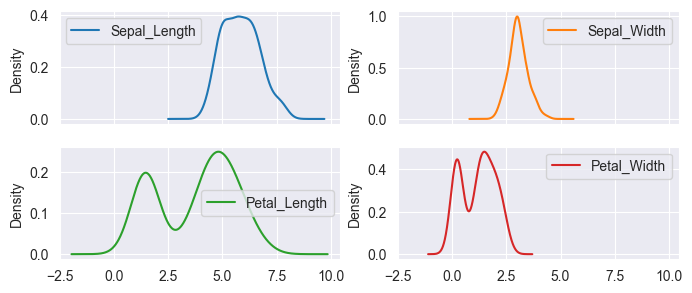

In [10]:
plt.figure()
dataset[features].plot.density(subplots=True,
                               layout=(7, 2),
                               figsize=(8, 12),
                               sharex=True,
                               sharey=False)
plt.show()
plt.close()

# Data Preprocessing

In every machine learning pipeline, the data needs some preprocessing.

Scikit-Learn offers a range of [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) methods that allow us to modify data and address issues such as missing values, outlier removal, feature scaling, and data handling.

For example in some machine learning algorithms, the scales of the features can have a huge impact on the performance of the model.

In **data scaling**, we aim to bring all features to the same scale to ensure that no feature dominates others due to its range. This is especially important for algorithms that rely on distance metrics.

Consider the k-nearest neighbors (KNN) algorithm, where we calculate the Euclidean distance to find the k nearest neighbors. When features have varying scales, it can significantly affect the algorithm's performance. If we don't normalize our data and bring features to similar scales, the algorithm will put more weight to features with larger scales, potentially leading to biased outcomes. In our case, for example, our dataset contains features with different scales, such as "Sepal_Length" and "Petal_Width".

# Scikit-Learn (Sklearn)

Scikit-Learn, is a powerful and widely-used machine learning library in Python. It provides a comprehensive set of tools for various machine learning tasks, making it an excellent choice for both beginners and experienced data scientists.

#### Key Features of Scikit-Learn

Sklearn offers a plethora of features and benefits, including:

- **User-Friendly Interface**: Sklearn provides a simple and consistent API that makes it easy to implement machine learning algorithms.
  
- **Wide Range of Algorithms**: It includes a diverse collection of machine learning algorithms, such as regression, classification, clustering, dimensionality reduction, and more.
  
- **Efficient Data Preprocessing**: Sklearn offers robust data preprocessing capabilities, including data cleaning, scaling, encoding, and feature selection.

- **Model Evaluation**: It provides tools for model evaluation, including various metrics for classification and regression tasks.

[Sklearn](https://scikit-learn.org/stable/supervised_learning.html) user guide.

The most common method to scale your dataset are listed bellow.
1. min-max scaling
    * $x_{scaled} = (x - min) / (max-min)$
    * $x_{scaled} \in [0,1]$
    * not good technique when you have outliers
    
    
2. standard scaling
   * $x_{scaled} = (x - mean) / std$
   * $mean(x_{scaled}) = 0$
   * $std(x_{scaled}) = 1$
   * robust to outliers

In [11]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(data_x[features])

norm_x = standard_scaler.transform(data_x[features])
# sklearn return a numpy so we can convert back to pandas
norm_x = pd.DataFrame(norm_x, columns=features)

In [12]:
norm_x

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


<Figure size 640x480 with 0 Axes>

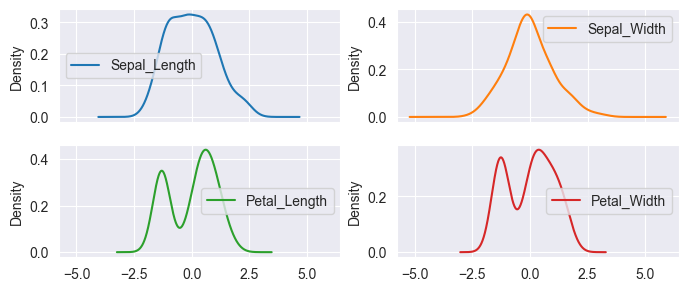

In [13]:
plt.figure()
norm_x[features].plot.density(subplots=True,
                              layout=(7, 2),
                              figsize=(8, 12),
                              sharex=True,
                              sharey=False)
plt.show()
plt.close()

In [14]:
norm_x[features].mean()

Sepal_Length   -4.736952e-16
Sepal_Width    -6.631732e-16
Petal_Length    3.315866e-16
Petal_Width    -2.842171e-16
dtype: float64

# Sklearn models API

Sklearn also offers a wide variety of [models](https://scikit-learn.org/stable/supervised_learning.html).

In [15]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)

In [16]:
# we can train our model using the fit method
model.fit(norm_x[features], data_y[target])

KNeighborsClassifier(n_neighbors=10)

In [17]:
# we can also make prediction on the dataset
model.predict(norm_x[features])

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [18]:
# we can get the predicted propabilities
model.predict_proba(norm_x[features])

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.7, 0.3

# Generalization

When developing a machine learning algorithm, the goal is not just to learn a model that good performance in our dataset. We want our model to be capable of generating accurate predictions for data it hasn't seen before. So we aim for our model to generalize well to upcoming data.

# Model Selection/Hyperparameter Tuning
In the process of model development, we often encounter **various candidate models** or different **hyperparameter** settings for our algorithms. For instance, in the k-nearest neighbors (KNN) algorithm, the choice of 'k' is a hyperparameter. Another hyperparameter is the distance metric used to calculate distances between data points. The collection of available candidates is typically referred to as the hypothesis space.

Therefore, when creating a model for a specific problem, our primary objective is typically to identify the model with the strongest generalization capabilities, the model that best explains future observations.

![Generalization](./figures/generalization.png)

# Choosing model based on the train data.

To demonstrate the problem of both training and measuring the accuracy on single dataset.

Lets split our data in two different dataset.
1. **Development set**: the that we can use in order to produce our final model.
2. **Testing set**: that we can use estimate the performance of our data in unseen data.

We assume that during the training we don't have any access to the Testing set, so we can use it to select the best model.

In [19]:
from sklearn.model_selection import train_test_split

# Split our data into training and test set.
X_develop, X_test, y_develop, y_test = train_test_split(norm_x, data_y, test_size=0.2, random_state=4, shuffle=True)

In [20]:
print("Development set size :", X_develop.shape[0]/norm_x.shape[0], "%" )
print("Test set size :", X_test.shape[0]/norm_x.shape[0], "%")

Development set size : 0.8 %
Test set size : 0.2 %


In [21]:
from sklearn.neighbors import KNeighborsClassifier

# train our model using the development set.
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_develop, y_develop[target])

KNeighborsClassifier(n_neighbors=1)

## Check the accuracy on train set

In [22]:
from sklearn.metrics import accuracy_score

# make prediction on the development set
prediction_train = model.predict(X_develop)

# measure the performance of the development set
train_score = accuracy_score(y_true=y_develop[target],
                             y_pred=prediction_train)
print(f"Accuracy Score: {train_score * 100}%")

Accuracy Score: 100.0%


## Check the accuracy on Test set

In [23]:
# make prediction on the Test set
prediction_test = model.predict(X_test)

# measure the Accuracy on the Test set
train_score = accuracy_score(y_true=y_test[target],
                             y_pred=prediction_test)

print(f"Accuracy Score: {train_score * 100}%")

Accuracy Score: 90.0%


We can observe that our model has different accuracy compared to the training and test sets.  
So there might be a better setting for k that could lead to better generalization.

# Assigment
## Training / Validation / Testing Dataset

A common approach for model selection is to split the dataset into three distinct parts:

1. The *training* set: used to train different models in the hypothesis space.
2. The *validation* set: used to evaluate the performance of each model and choose the best one.
3. The *testing* set: used to measure the performance of the final model.

The process for each model and set of hyperparameters is as follows:
1. Train the model using the training set.
2. Estimate the model’s performance on the validation set.
3. Select the model that performs best on the validation set.
4. Obtain an unbiased estimate of the selected model’s performance using the testing set.

In [24]:
# define different hyperparameters
different_k_settings = list(range(1, 70, 10))

### Implemention

No we will implement the model selection method.

#### Step A.
Create the training (80%) and validation (20%) set by spliting the development set in two parts.

#### Step B.  

For every hypeparamter k we can:  
    1. Train the model using the training set  
    2. Get the performance of the model in terms Accuracy on the Train set.  
    3. Get the performance of the model in terms Accuracy on the Validation set.  
    4. Get the performance of the model in terms Accuracy on the Test set.
    5. Store all results

#### Step C. 
Plot the performance for each hyperparameter `k` measured on the different datasets to visualize the differences. 

More specifically, we can create a plot where the x-axis represents the different hyperparameter settings, and the y-axis measures performance. Each dataset’s performance can be represented by a separate line.


What you observe?

#### Step D. 
Select the model with the best Accuracy according to the Validation Set.